## Locally weighted regression

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

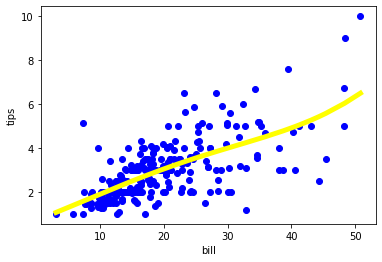

In [11]:
def kernel(point,xmat,k):
    m,n=np.shape(X)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point,xmat,ymat,k):
    wt = kernel(point,xmat,k)
    W = (X.T*(wt*X)).I*(X.T*wt*ymat.T)
    return W


def locallyWeightedRegression(xmat,ymat,k):
    m,n=np.shape(xmat)
    ypred = np.zeros((m))
    for i in range(m):
        ypred[i] = xmat[i] * localWeight(xmat[i],xmat,ymat,k)
    return ypred



data = pd.read_csv('../data/data10_tips.csv')
bills = np.array(data.total_bill)
tips = np.array(data.tip)


mbill = np.mat(bills)
mtips = np.mat(tips)

cols= np.shape(mtips)[1]

one = np.ones((1,cols),dtype=int)
X = np.hstack((one.T,mbill.T))



ypred = locallyWeightedRegression(X,mtips,0.5)

xsort = X.copy()
xsort.sort(0)

plt.scatter(bills,tips,color='blue')
plt.plot(xsort[:,1],ypred[X[:,1].argsort(0)],color='yellow',linewidth=5)
plt.xlabel('bill')
plt.ylabel('tips')
plt.show()